In [30]:
pip install matplotlib

  Using cached contourpy-1.2.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached pillow-10.4.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 12.2 MB/s eta 0:00:000:00:010:00:0101m
Using cached contourpy-1.2.1-cp312-cp312-macosx_11_0_arm64.whl (245 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.53.1-cp312-cp312-macosx_11_0_arm64.whl (2.2 MB)
Using cached kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl (64 kB)
Using cached pillow-10.4.0-cp312-cp312-macosx_11_0_arm64.whl (3.4 MB)
Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)

[notice] A new release of pip is available: 24.0

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
from matplotlib.colors import ListedColormap

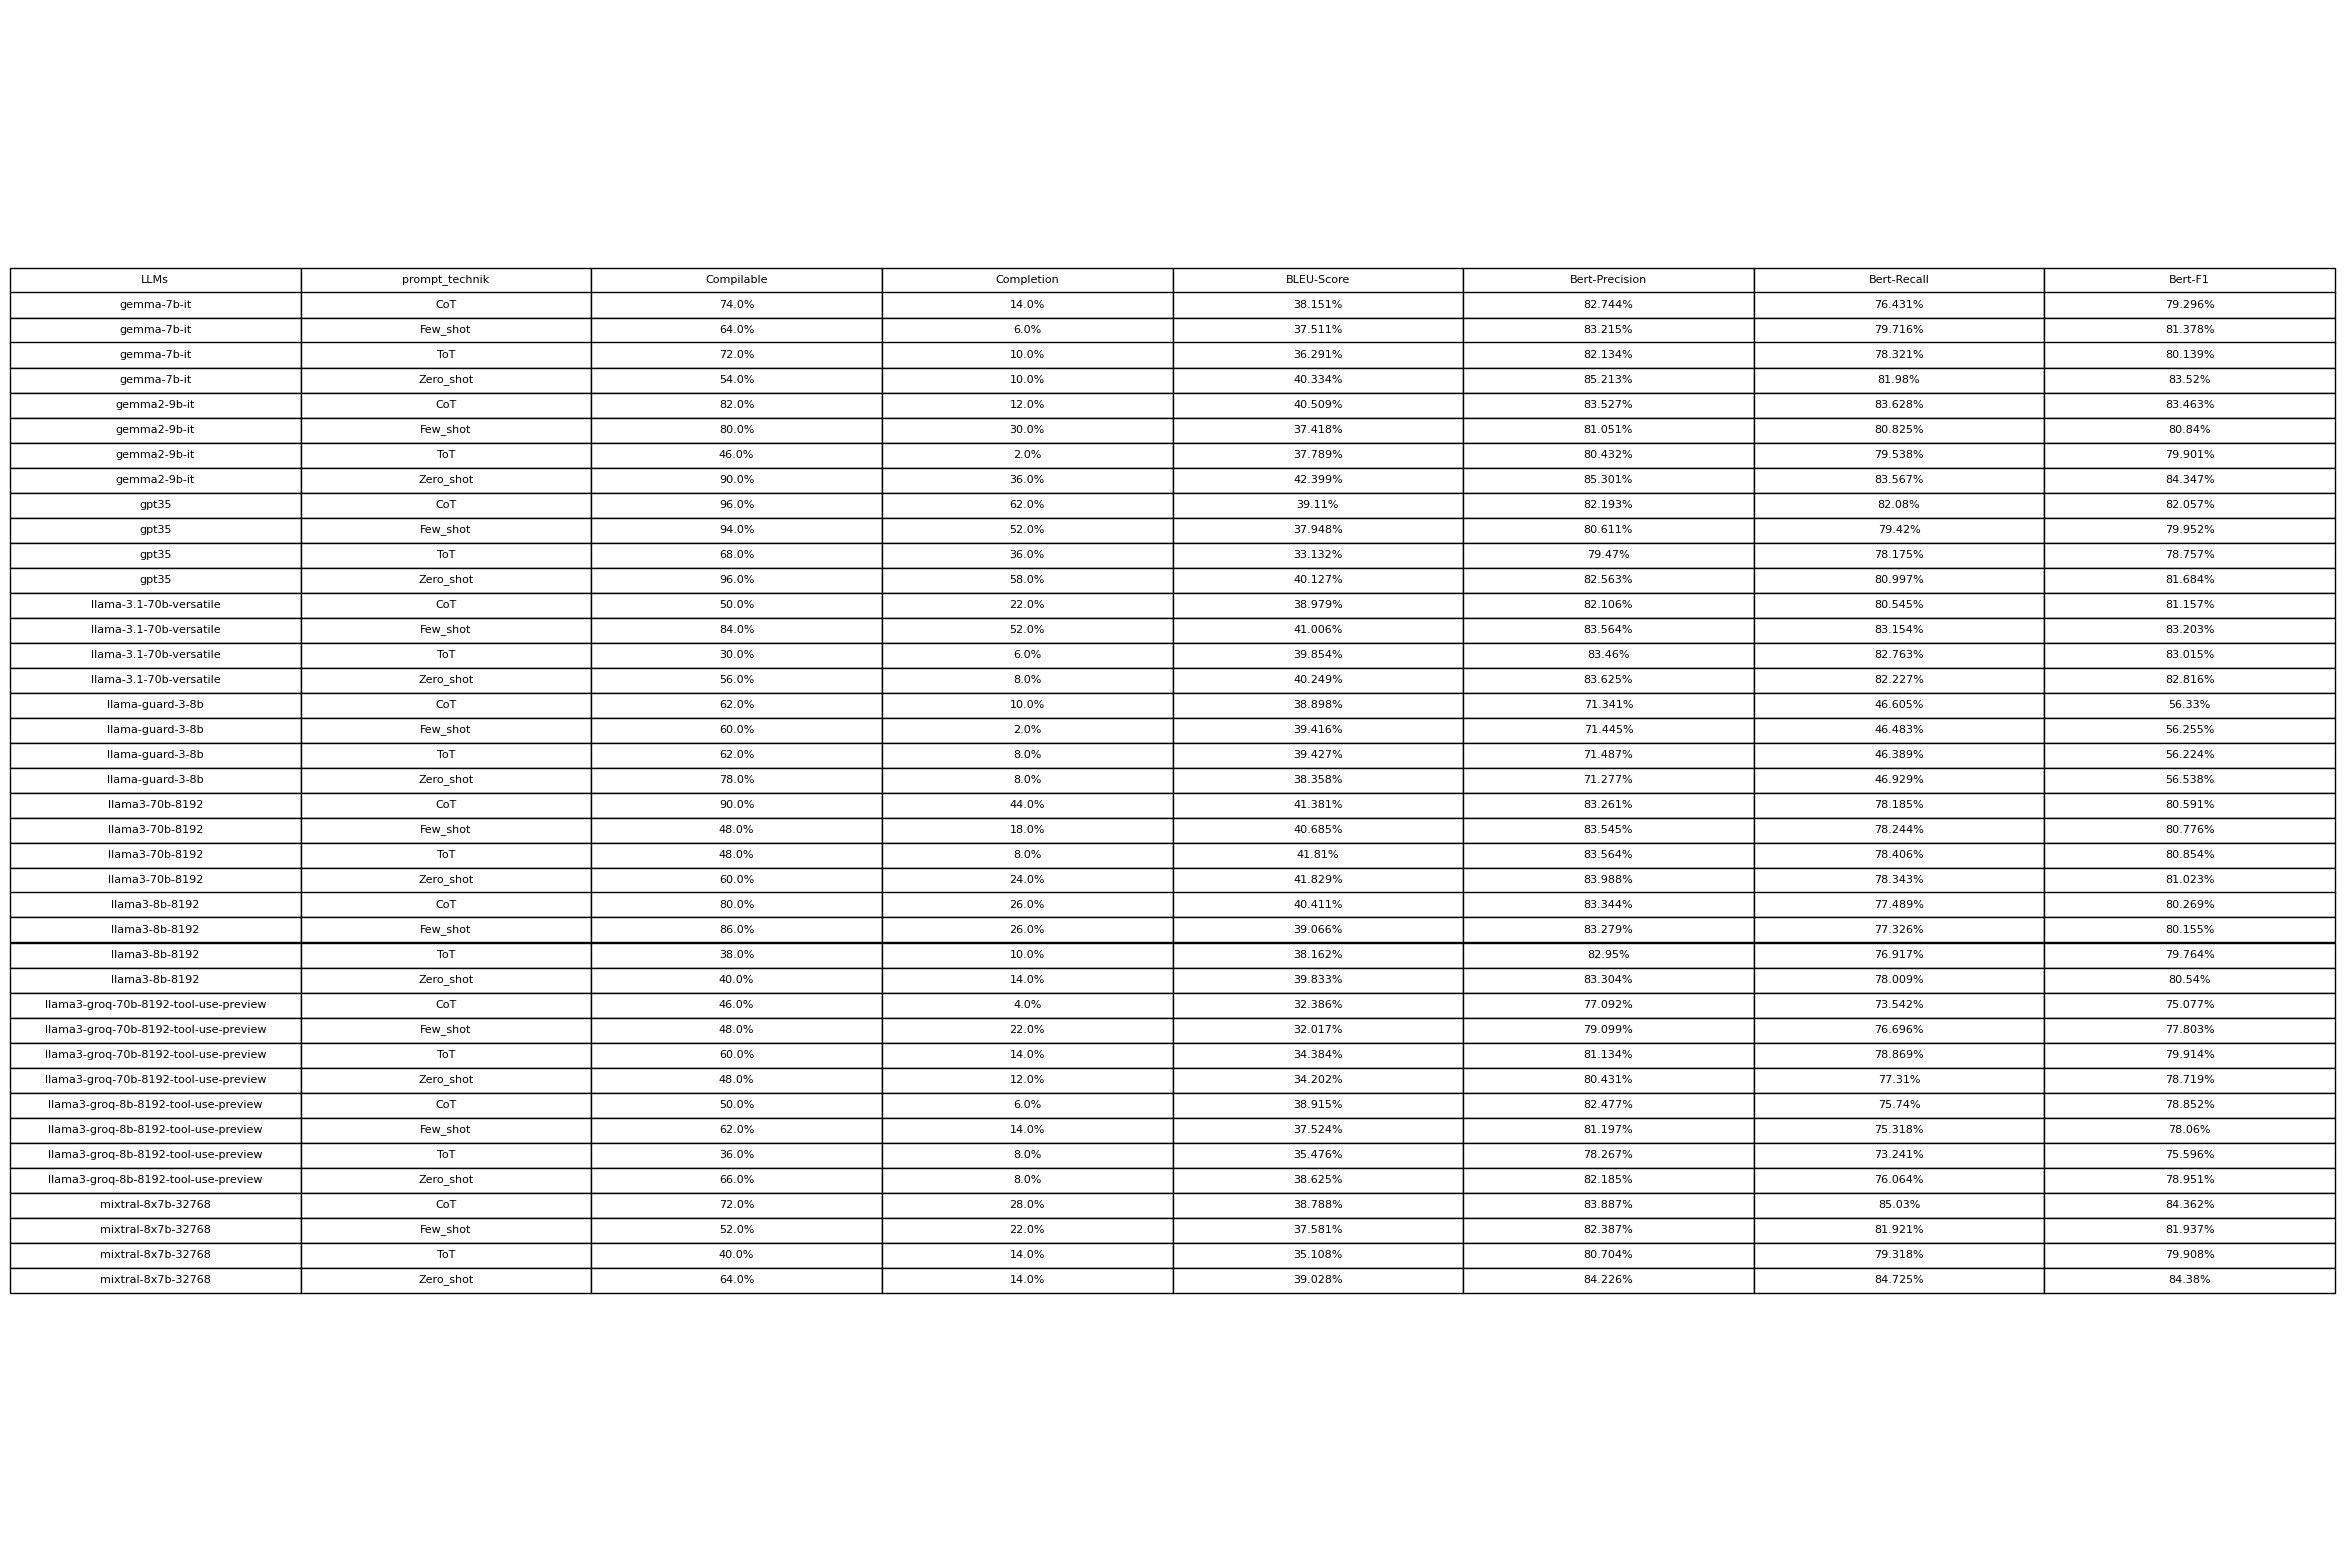

In [3]:
# Lade die CSV-Datei
csv_file = 'normals_output.csv'
df = pd.read_csv(csv_file)

# Kürzere Namen für die Spalten
points_columns = {
    'compilable_evaluation': 'Compilable',
    'completion_evaluation': 'Completion',
    'code_bleu_average_score.bleu_score': 'BLEU-Score',
    'codeBert_average_score.codeBert_average_precision': 'Bert-Precision',
    'codeBert_average_score.codeBert_average_recall': 'Bert-Recall',
    'codeBert_average_score.codeBert_average_f1': 'Bert-F1'
}

# Gruppiere die Daten nach 'model_name' und 'prompt_technik'
grouped_df = df.groupby(['model_name', 'prompt_technik'])[list(points_columns.keys())].mean().reset_index()

# Runden und in Prozent umrechnen
for col in points_columns.keys():
    grouped_df[col] = (grouped_df[col] * 100).round(3)

# Erstelle eine Liste für die Tabellendaten
table_data = []
uniq_modell_name = None
for _, row in grouped_df.iterrows():
    model_name = row['model_name']
    prompt_technik = row['prompt_technik']
    points = [f"{row[col]}%" for col in points_columns.keys()]  # Werte in Prozent mit % umwandeln
    table_data.append([model_name, prompt_technik] + points)

# Konvertiere die Liste in ein DataFrame mit den neuen, kürzeren Spaltennamen
columns = ['LLMs', 'prompt_technik'] + list(points_columns.values())
table_df = pd.DataFrame(table_data, columns=columns)

# Speichere die Tabelle als CSV-Datei
table_df.to_csv('eval_normals.csv', index=False)

# Erstelle eine Tabelle als Plot
fig, ax = plt.subplots(figsize=(20, len(table_df) * 0.5))  # Dynamische Höhe basierend auf der Anzahl der Zeilen
ax.axis('tight')
ax.axis('off')

# Erstelle eine Tabelle in der Matplotlib-Figur
table = ax.table(cellText=table_df.values, colLabels=table_df.columns, cellLoc='center', loc='center')

# Setze die Schriftgröße und skaliere die Tabelle
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1.5, 1.5)

# Zeige die Tabelle an
plt.show()


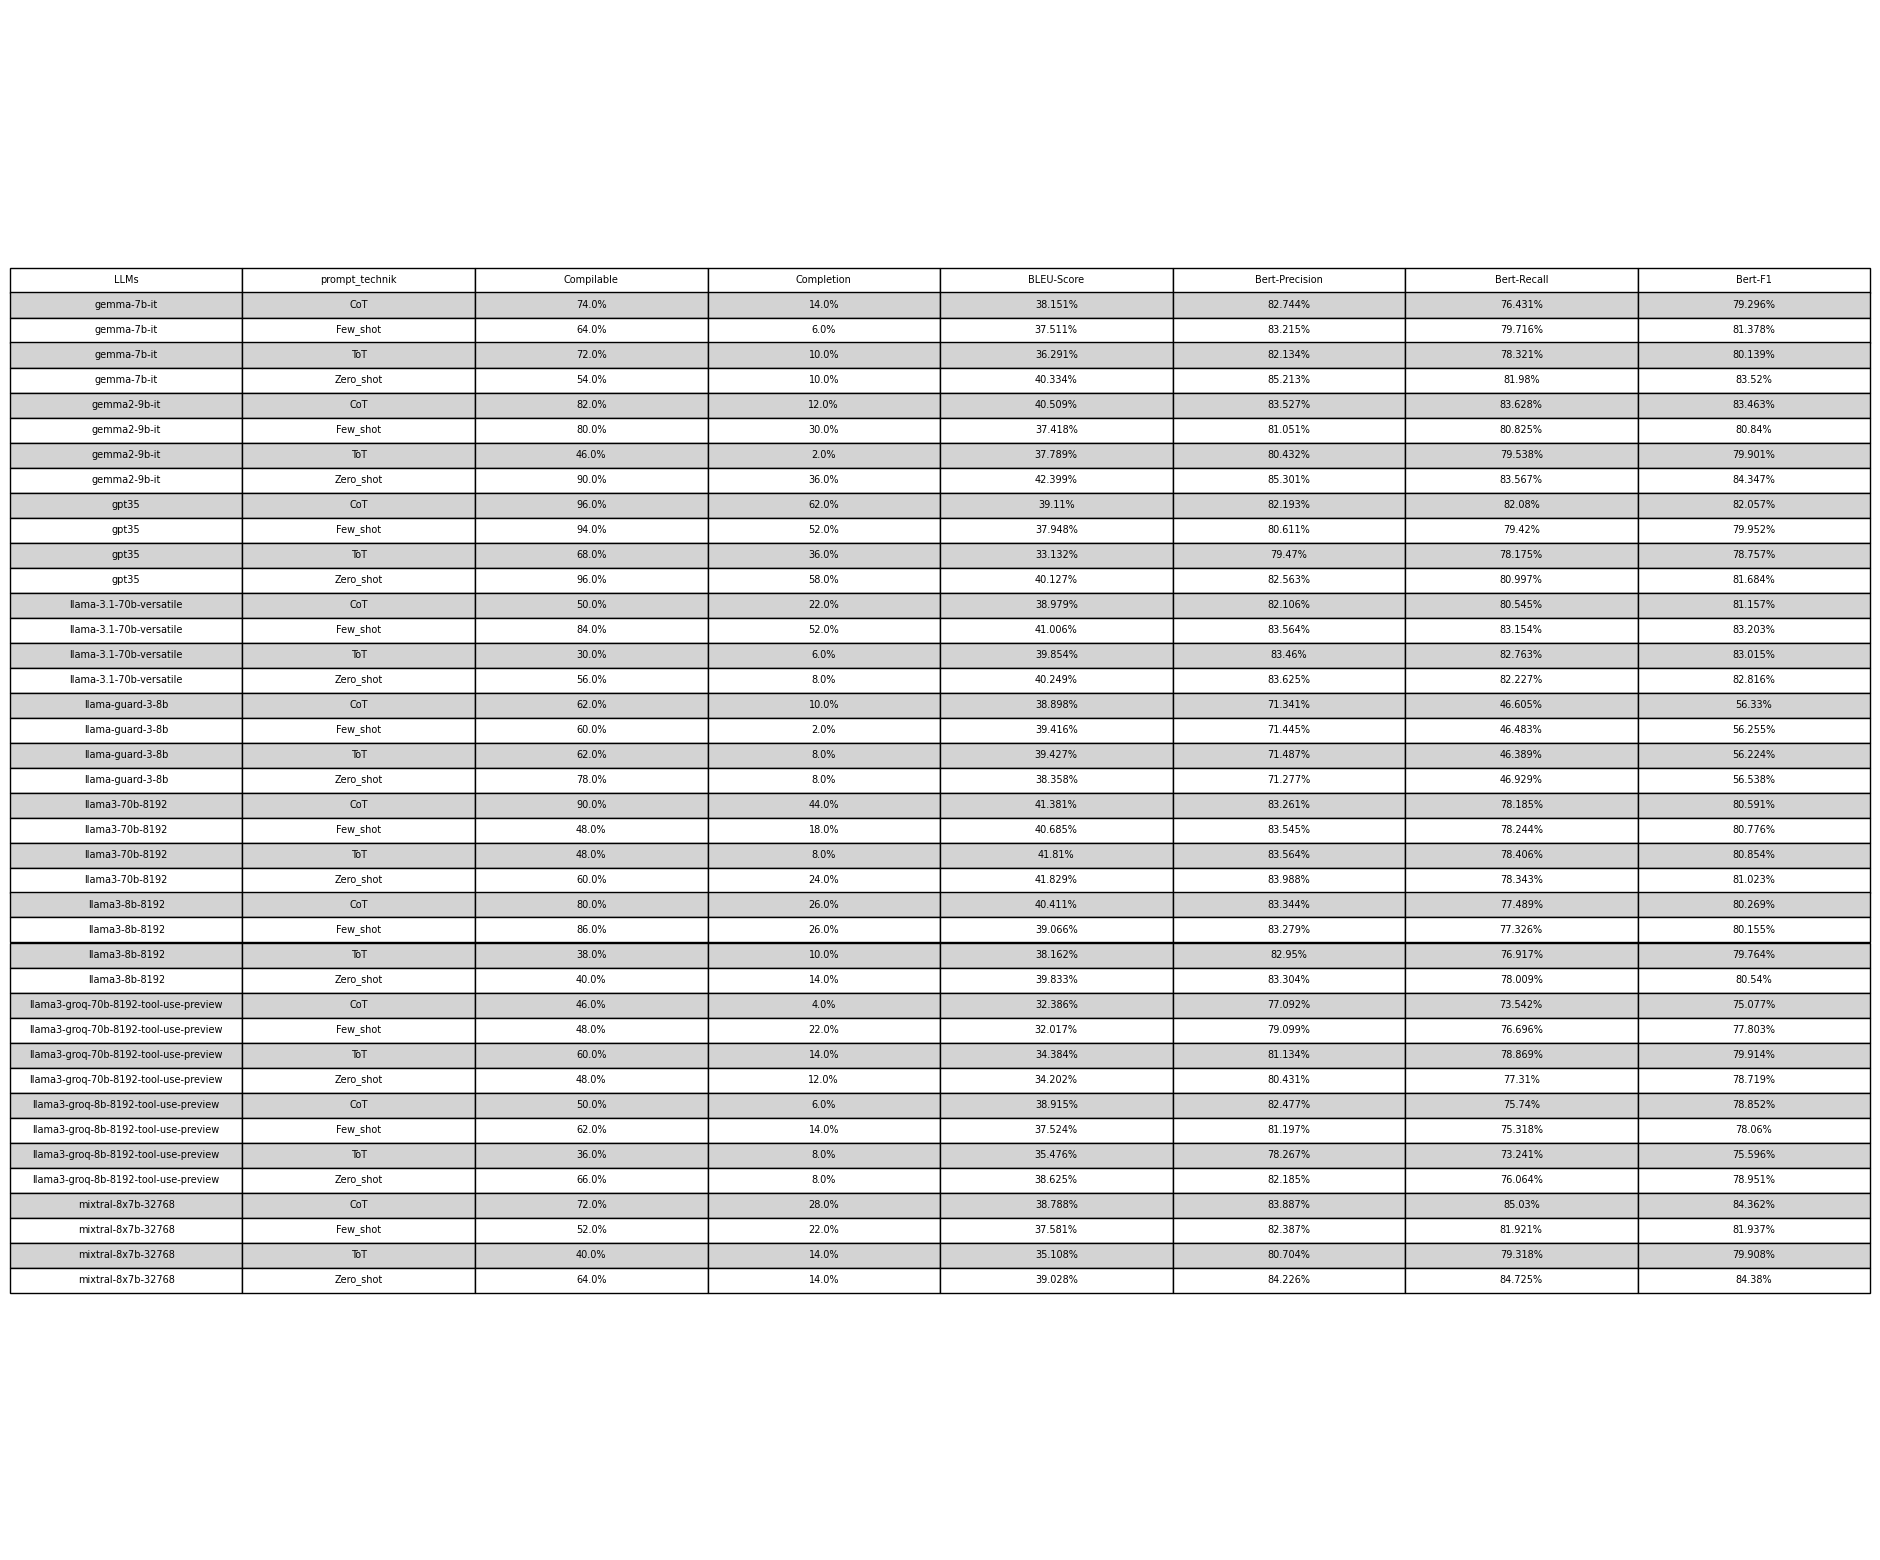

In [4]:
# Lade die CSV-Datei
csv_file = 'normals_output.csv'
df = pd.read_csv(csv_file)

# Gruppiere die Daten nach 'model_name' und 'prompt_technik'
grouped_df = df.groupby(['prompt_technik'])[list(points_columns.keys())].mean().reset_index()

# Runden und in Prozent umrechnen
for col in points_columns.keys():
    grouped_df[col] = (grouped_df[col] * 100).round(2).astype(str) + '%'

# Erstelle eine Liste für die Tabellendaten
table_data = []
previous_model_name = None

for i, row in grouped_df.iterrows():
    prompt_technik = row['prompt_technik']
    points = [row[col] for col in points_columns.keys()]  # Werte in Prozent mit % umwandeln

    if model_name == previous_model_name:
        table_data.append([prompt_technik] + points)

    previous_model_name = model_name

# Erstelle eine Tabelle als Plot
fig, ax = plt.subplots(figsize=(12, len(table_df) * 0.5))  # Dynamische Höhe basierend auf der Anzahl der Zeilen
ax.axis('tight')
ax.axis('off')

# Erstelle eine Tabelle in der Matplotlib-Figur
table = ax.table(cellText=table_df.values, colLabels=table_df.columns, cellLoc='center', loc='center')

# Setze die Schriftgröße und skaliere die Tabelle
table.auto_set_font_size(True)
table.set_fontsize(8)
table.scale(2, 1.5)

# Anwenden von Farben für jede zweite Zeile
row_colors = ['lightgray', 'white']
for i in range(len(table_df)):
    table[i + 1, 0].set_facecolor(row_colors[i % 2])
    for j in range(1, len(columns)):
        table[i + 1, j].set_facecolor(row_colors[i % 2])
        
# Verbinde die Zellen mit dem gleichen Modellnamen und setze den Text in die Mitte
for i in range(len(table_df)):
    if table_df.iloc[i, 0] == '':
        table[(i + 1, 0)].visible_edges = "LR"  # Setze die linken und rechten Ränder sichtbar
    

# Zeige die Tabelle an
plt.show()
